# Our target:-

Data Understanding, Preparation, and EDA (25%):

Conduct data quality checks, address issues, and explain them in comments.

Handle categorical variables appropriately.

Create dummy variables properly.

Derive new metrics if applicable and use them for analysis.

Convert data to a clean format suitable for analysis.



Model Building and Evaluation (50%):

Tune model parameters using correct principles and explain the approach.

Consider both technical and business aspects while building the model.

Use correct variable selection techniques.

Attempt a reasonable number of different models and choose the best one based on key performance metrics.

Perform residual analysis after model building and validate assumptions.

Evaluate the model using appropriate principles and metrics.

Interpret and explain the model in simple terms, including important variables.



Coding Guidelines (5%):

Write appropriate comments where applicable.

Use descriptive and unambiguous names for new variables.

Write concise code with good readability and appropriate indentations.

Ensure the GitHub repository is public and contains a Python file, PDF file, and a README.md file.

The README.md file should provide a brief description of the project.

State any assumptions clearly.



Subjective Questions (20%):

Provide correct, concise, and to-the-point answers.

Include examples where necessary.

# Import necessary libraries

In [29]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import FunctionTransformer

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

# Load the dataset

In [2]:
# Import data from CSV file
file_path = 'Data/day.csv'

try:
    dayData = pd.read_csv(file_path, delimiter=',', low_memory=False)
    print('Data Load: Successful')
except FileNotFoundError:
    print(f'Error: File "{file_path}" not found.')
except pd.errors.EmptyDataError:
    print(f'Error: File "{file_path}" is empty.')
except pd.errors.ParserError:
    print(f'Error: Unable to parse data from file "{file_path}". Check the file format.')
except Exception as e:
    import traceback
    traceback.print_exc()
    print(f'Error: An unexpected error occurred while loading data. {str(e)}')
    print('Data Load: Failure')


Data Load: Successful


In [3]:
# Print the head of the data
print("Head of the Data:")
dayData.head()     # Adjust the number as needed

Head of the Data:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Print the tail of the data
print("\nTail of the Data:")
dayData.tail()     # Adjust the number as needed


Tail of the Data:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
# Print a sample of the data
print("\nSample of the Data:")
dayData.sample(5)  # Adjust the number as needed


Sample of the Data:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
134,135,15-05-2018,2,0,5,0,0,0,2,23.062500,26.80000,86.7083,10.249593,1582,2971,4553
683,684,15-11-2019,4,1,11,0,4,1,2,13.188347,16.22460,62.0417,10.250129,320,5125,5445
189,190,09-07-2018,3,0,7,0,6,0,1,30.066653,33.20790,60.9167,11.250104,1988,3348,5336
95,96,06-04-2018,2,0,4,0,3,1,1,16.024153,19.38040,47.0833,17.625221,413,2395,2808
310,311,07-11-2018,4,0,11,0,1,1,1,16.195000,20.04355,75.8750,3.834075,373,3662,4035


# Data Understanding

In [6]:
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
categorical_columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [7]:
# Function for Summary Statistics
def get_statistics(df, numeric_columns, categorical_columns):
    # Initialize an empty DataFrame to store the summary
    summary_df = pd.DataFrame()

    # Iterate through each column in the input DataFrame
    for i, column in enumerate(df.columns):
        # Store the variable name in the summary DataFrame
        summary_df.loc[i, 'Variable'] = column

        # Record the data type of the variable
        summary_df.loc[i, 'Data Type'] = df[column].dtype

        # Count the number of missing values in the variable
        summary_df.loc[i, 'Null Count'] = df[column].isna().sum()

        # Count the number of duplicate values in the variable
        summary_df.loc[i, 'Duplicate Count'] = df[column].duplicated().sum()

        # Record the total count of non-null values in the variable
        summary_df.loc[i, 'Total Count'] = df[column].describe()['count']

        # For numerical variables, tabulate additional descriptive statistics
        if column in numeric_columns:
            summary_df.loc[i, 'Mean'] = df[column].describe()['mean']
            summary_df.loc[i, 'Std Dev'] = df[column].describe()['std']
            summary_df.loc[i, 'Min'] = df[column].describe()['min']
            summary_df.loc[i, '25%'] = df[column].describe()['25%']
            summary_df.loc[i, '50%'] = df[column].describe()['50%']
            summary_df.loc[i, '75%'] = df[column].describe()['75%']
            summary_df.loc[i, 'Max'] = df[column].describe()['max']
            summary_df.loc[i, 'Unique Values of numbers'] = df[column].nunique()

        # For categorical variables, tabulate unique values, most frequent value, and its frequency
        elif column in categorical_columns:
            summary_df.loc[i, 'Unique Values'] = df[column].nunique()
            summary_df.loc[i, 'Top Value'] = df[column].mode().iloc[0]  # Use mode() instead of describe()
            summary_df.loc[i, 'Frequency'] = df[column].value_counts().max()
            summary_df.loc[i, 'Categorical'] = True

    return summary_df


In [8]:
dayDataWithAssessments = get_statistics(dayData, numeric_columns, categorical_columns)
dayDataWithAssessments

,Variable,Data Type,Null Count,Duplicate Count,Total Count,Unique Values,Top Value,Frequency,Categorical,Mean,Std Dev,Min,25%,50%,75%,Max,Unique Values of numbers
0,instant,int64,0.0,0.0,730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dteday,object,0.0,0.0,730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,season,int64,0.0,726.0,730.0,4.0,3.0,188.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,yr,int64,0.0,728.0,730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mnth,int64,0.0,718.0,730.0,12.0,1.0,62.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,holiday,int64,0.0,728.0,730.0,2.0,0.0,709.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,weekday,int64,0.0,723.0,730.0,7.0,0.0,105.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,workingday,int64,0.0,728.0,730.0,2.0,1.0,499.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,weathersit,int64,0.0,727.0,730.0,3.0,1.0,463.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,temp,float64,0.0,232.0,730.0,NaN,NaN,NaN,NaN,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347,498.0


In [9]:
# Assessment Function
def assess_columns(dayData, columns):
    """Perform visual, programmatic assessments, and display detailed statistics for specified columns."""
    for col in columns:
        print(f"\n{'='*50}\n{'Assessment Summary for'} '{col}'\n{'='*50}")
        
        # Visual assessment
        print(f"Visual Assessment of '{col}'".center(50, '-'))
        print(f"Head:\n{dayData[col].head()}\n")
        print(f"Tail:\n{dayData[col].tail()}\n")
        print(f"Sample:\n{dayData[col].sample(5)}\n")

        # Programmatic assessment
        datatype = dayData[col].dtype
        null_count = dayData[col].isnull().sum()
        null_percentage = (null_count / len(dayData) * 100)
        duplicate_count = dayData[col].duplicated().sum()

        print(f"Programmatic Assessment of '{col}'".center(50, '-'))
        print(f"Data Type: {datatype}")
        print(f"Null Count: {null_count}")
        print(f"Null Percentage: {null_percentage:.2f}%")
        print(f"Duplicate Count: {duplicate_count}\n")

        # Add check for categorical columns
        if col in categorical_columns:
            # Display additional information specific to categorical columns
            print(f"Number of Unique Categories: {dayData[col].nunique()}")

        # Counts of unique values
        unique_values = dayData[col].value_counts()
        print(f"Counts of Unique Values for '{col}':\n{unique_values}\n")

        # Descriptive Statistics
        descriptive_stats = dayData[col].describe().to_frame().transpose()

        # Add skewness and kurtosis for numeric columns
        if col in numeric_columns:
            descriptive_stats['Skewness'] = dayData[col].skew()
            descriptive_stats['Kurtosis'] = dayData[col].kurtosis()

        print(f"Descriptive Statistics for '{col}':\n{descriptive_stats}\n")

In [10]:
dayDataWithStatistics = assess_columns(dayData, columns)
dayDataWithStatistics


Assessment Summary for 'temp'
-----------Visual Assessment of 'temp'------------
Head:
0    14.110847
1    14.902598
2     8.050924
3     8.200000
4     9.305237
Name: temp, dtype: float64

Tail:
725    10.420847
726    10.386653
727    10.386653
728    10.489153
729     8.849153
Name: temp, dtype: float64

Sample:
278    20.260847
707    15.750847
28      8.057402
46     13.048701
331    20.642598
Name: temp, dtype: float64

--------Programmatic Assessment of 'temp'---------
Data Type: float64
Null Count: 0
Null Percentage: 0.00%
Duplicate Count: 232

Counts of Unique Values for 'temp':
temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64

Descriptive Statistics for 'temp':
      count       mean       std       min        25%        50%        75%  \
temp  730.0  20.319259  7.506729  2.424346  13.811885  20.465826  26.880615   



Since there are no duplicate rows and missing values, it seems the data is clean in these aspects.

In [11]:
dayData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Preparation

In [12]:
# Convert 'dteday' to datetime format with the correct format
dayData['dteday'] = pd.to_datetime(dayData['dteday'], format="%d-%m-%Y")

In [13]:
print("\nData Types:")
print(dayData.dtypes)


Data Types:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


Converting season columns to catagory

In [14]:
dayData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
dayData = dayData.drop(['dteday','instant'], axis=1)
dayData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
seasonDist = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
dayData['season'] = dayData['season'].apply(lambda x: seasonDist[x]).astype(str)

In [17]:
weathersitDist = {1:"clear", 2:"mist", 3:"light_snow", 4:"heavy_rain"}
dayData['weathersit'] = dayData['weathersit'].apply(lambda x: weathersitDist[x]).astype(str)

In [18]:
weekdayDist = {0:"monday", 1:"tuesday", 2:"wednesday", 3:"thrusday", 4:"friday", 5:"saturday", 6:"sunday"}
dayData['weekday'] = dayData['weekday'].apply(lambda x: weekdayDist[x]).astype(str)

In [19]:
dayData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,sunday,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,monday,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,tuesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,wednesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,thrusday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

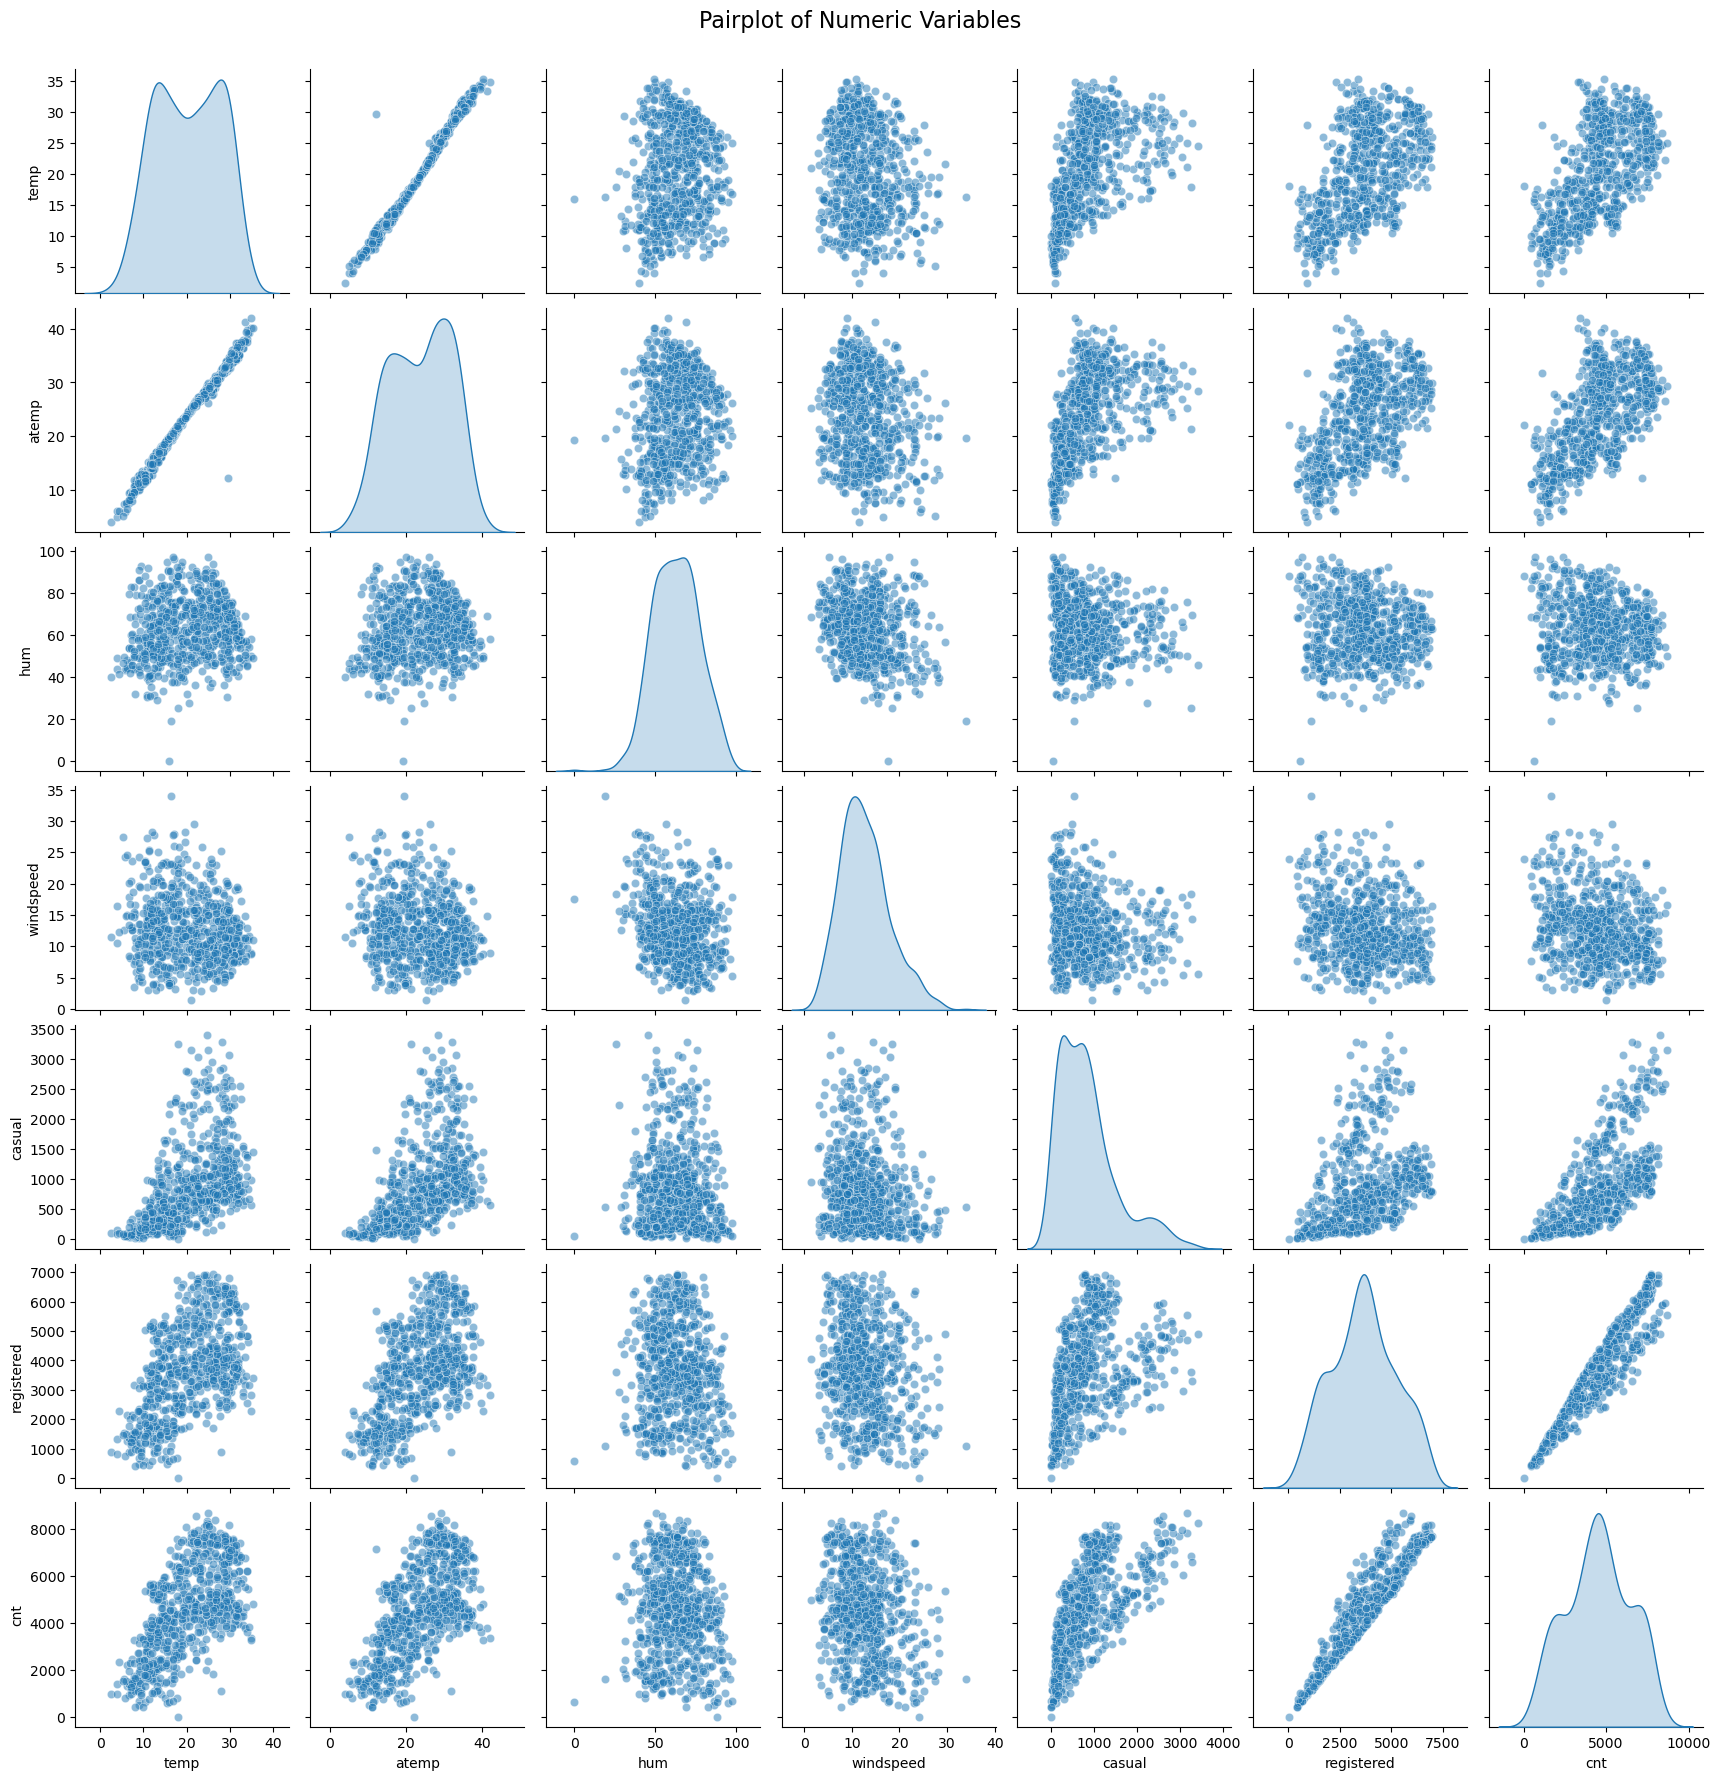

In [20]:
# Selecting only numeric columns for the pairplot

numeric_data = dayData[numeric_columns]

# Set a custom color palette for better aesthetics
custom_palette = sns.color_palette("viridis", as_cmap=True)

# Visualize Numeric Variables using Pairplot with increased data points
sns.pairplot(numeric_data, height=2.5, palette=custom_palette, markers='o', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Numeric Variables', y=1.02, size=16)
plt.show()

## Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

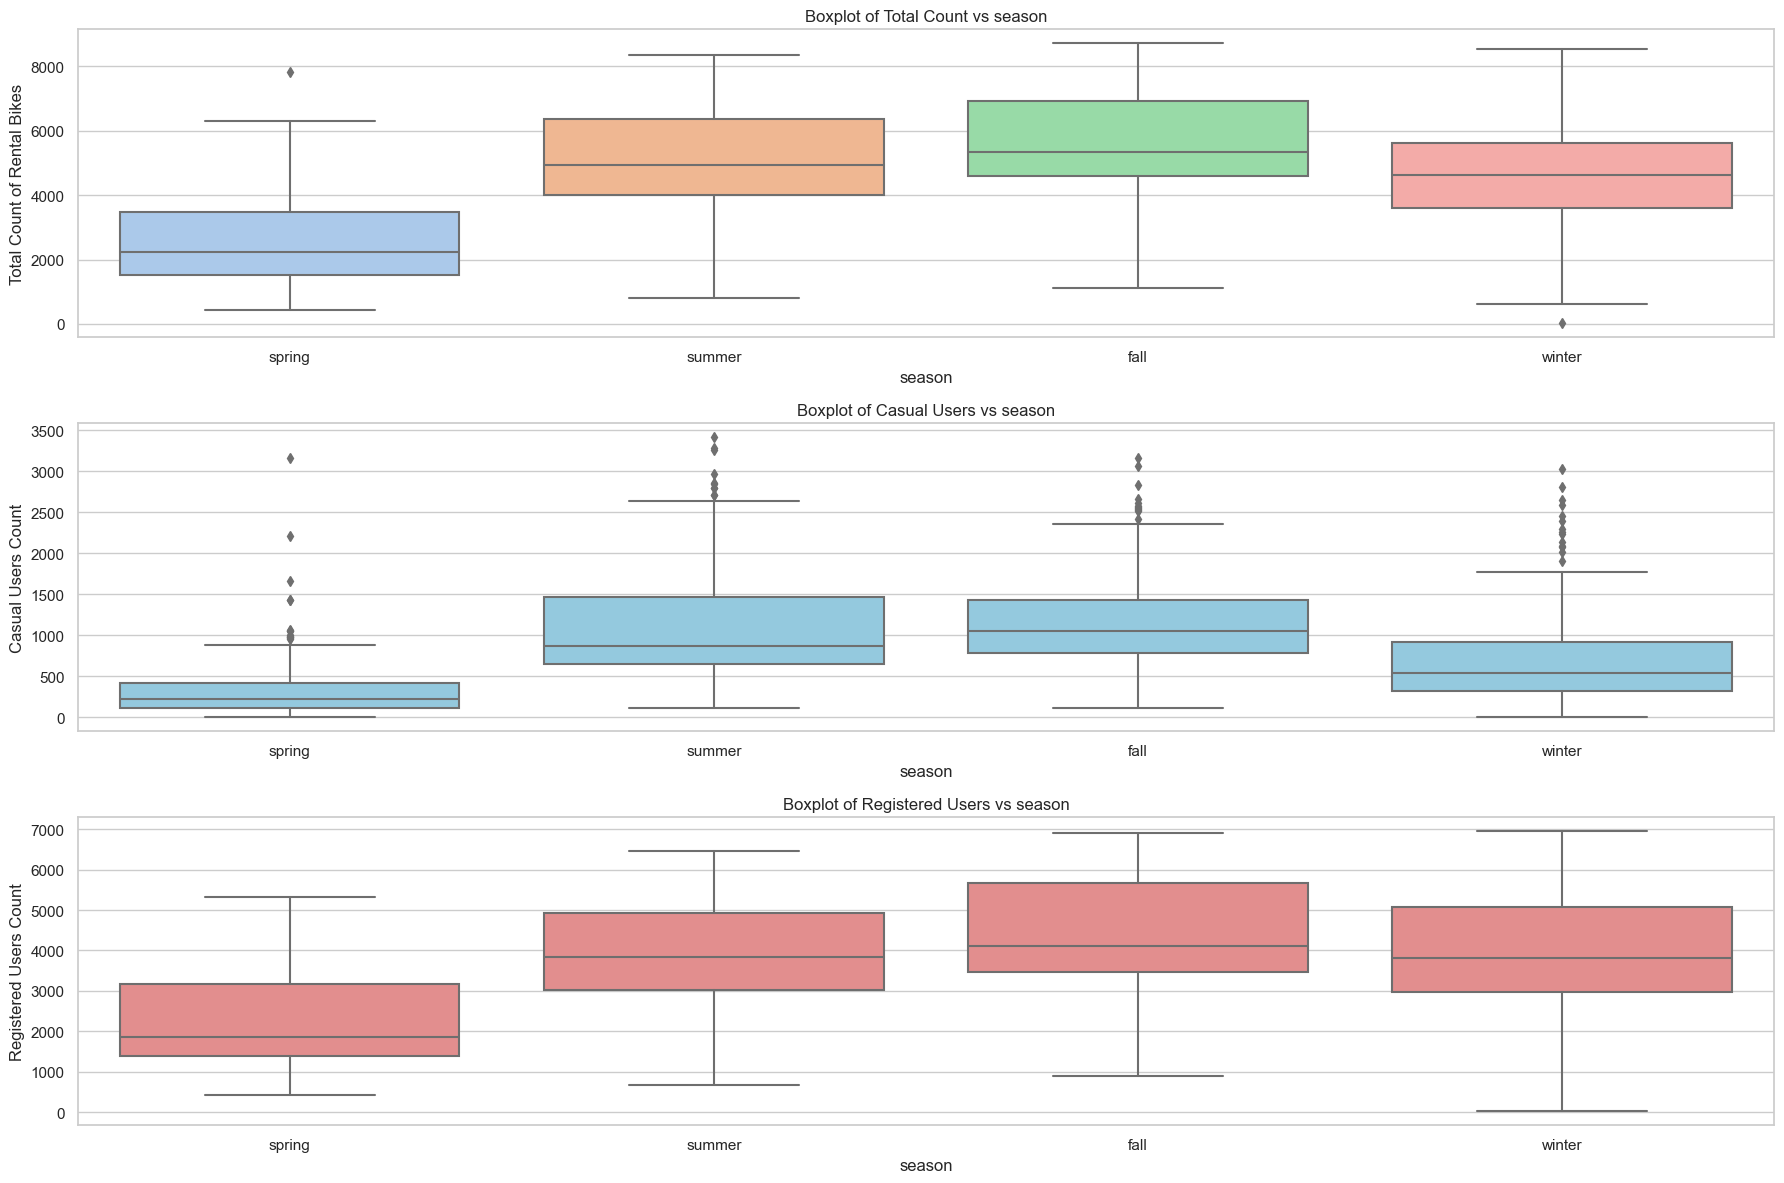

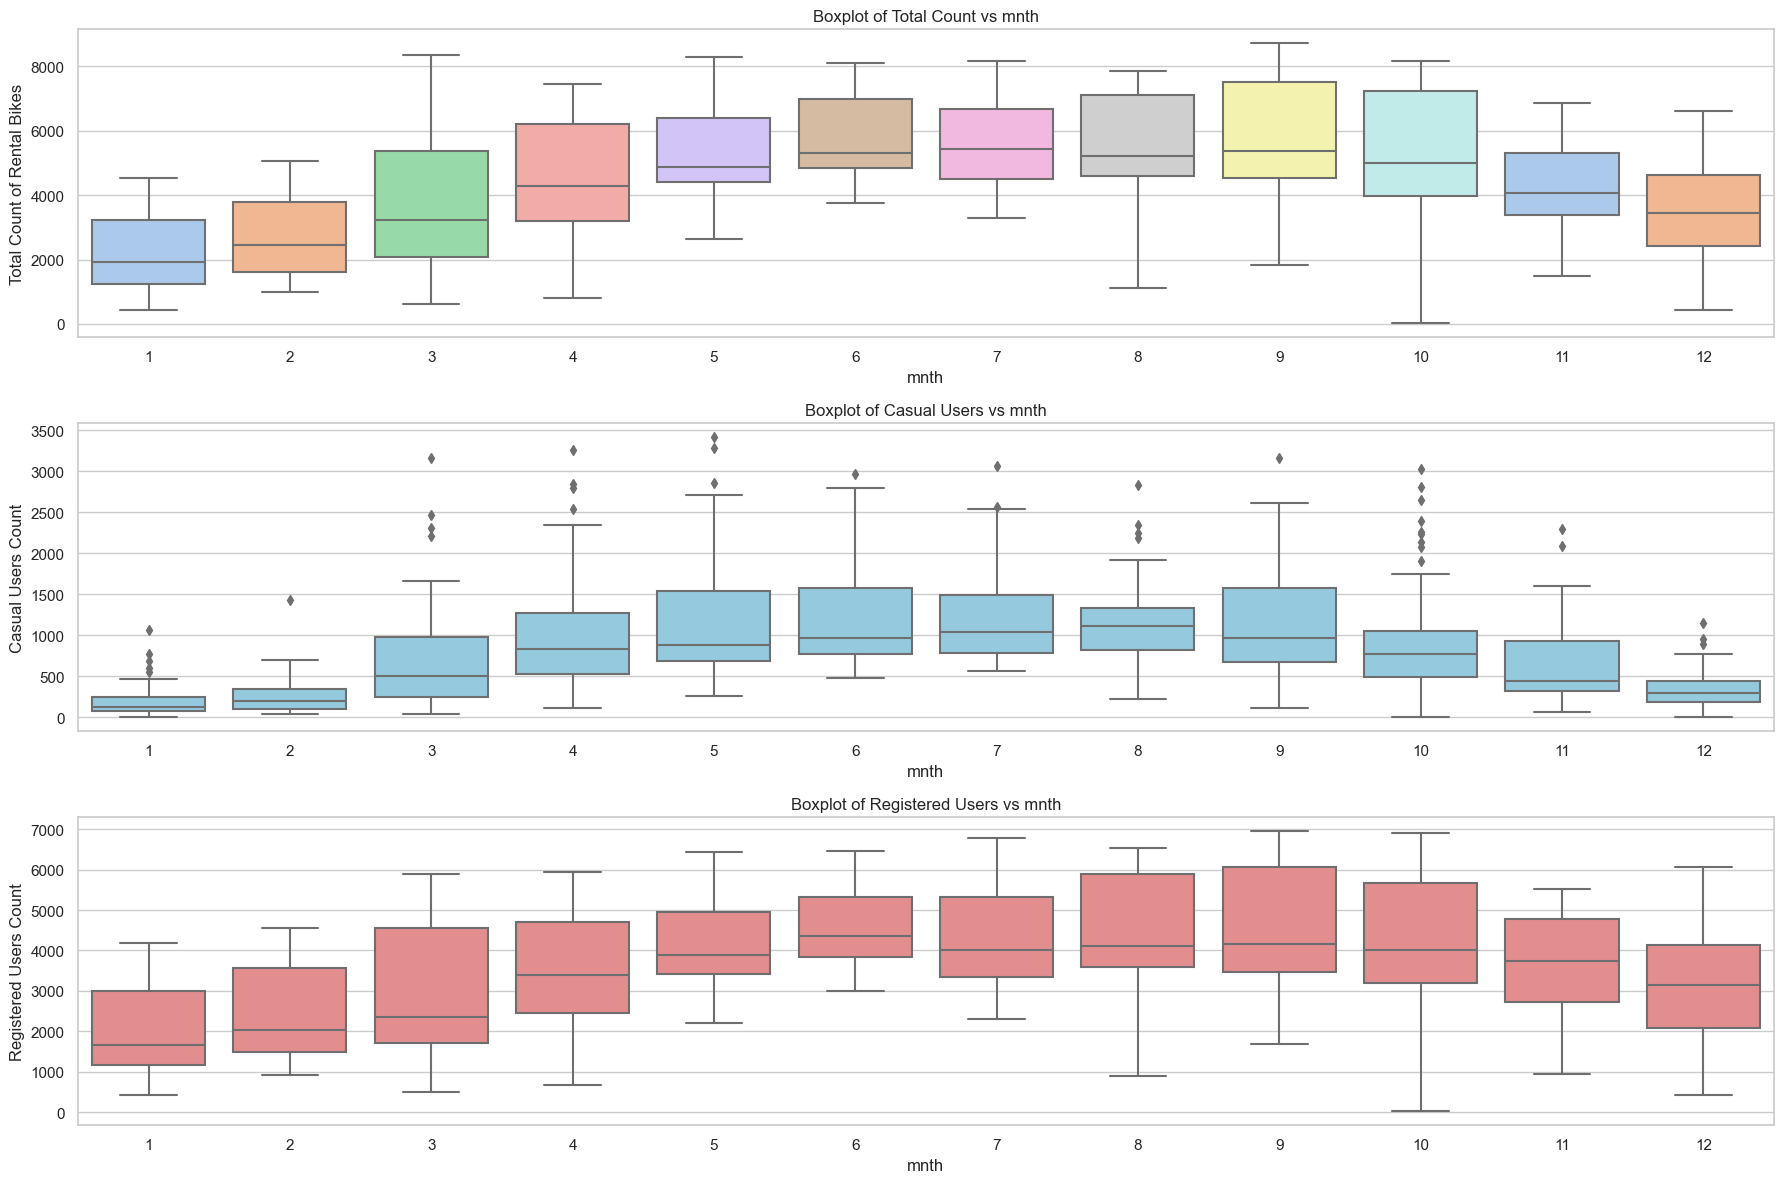

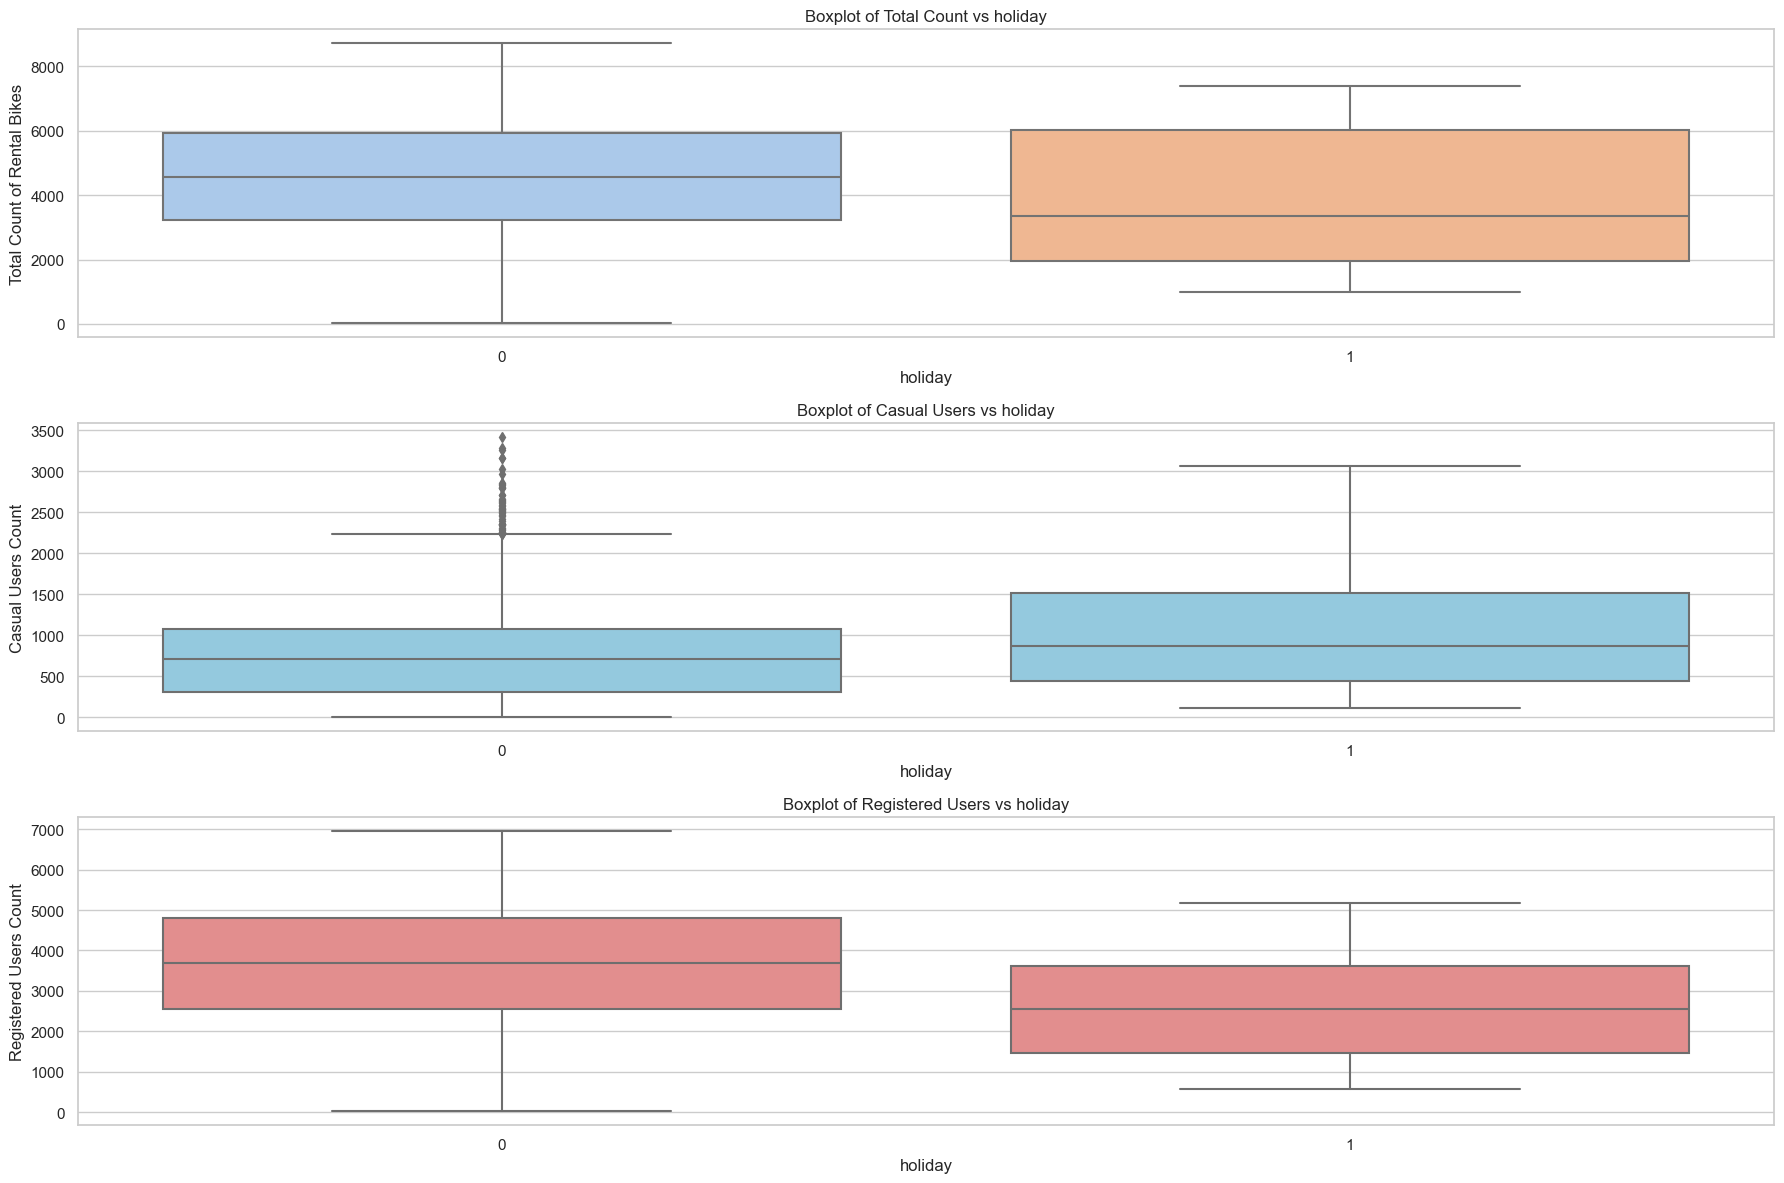

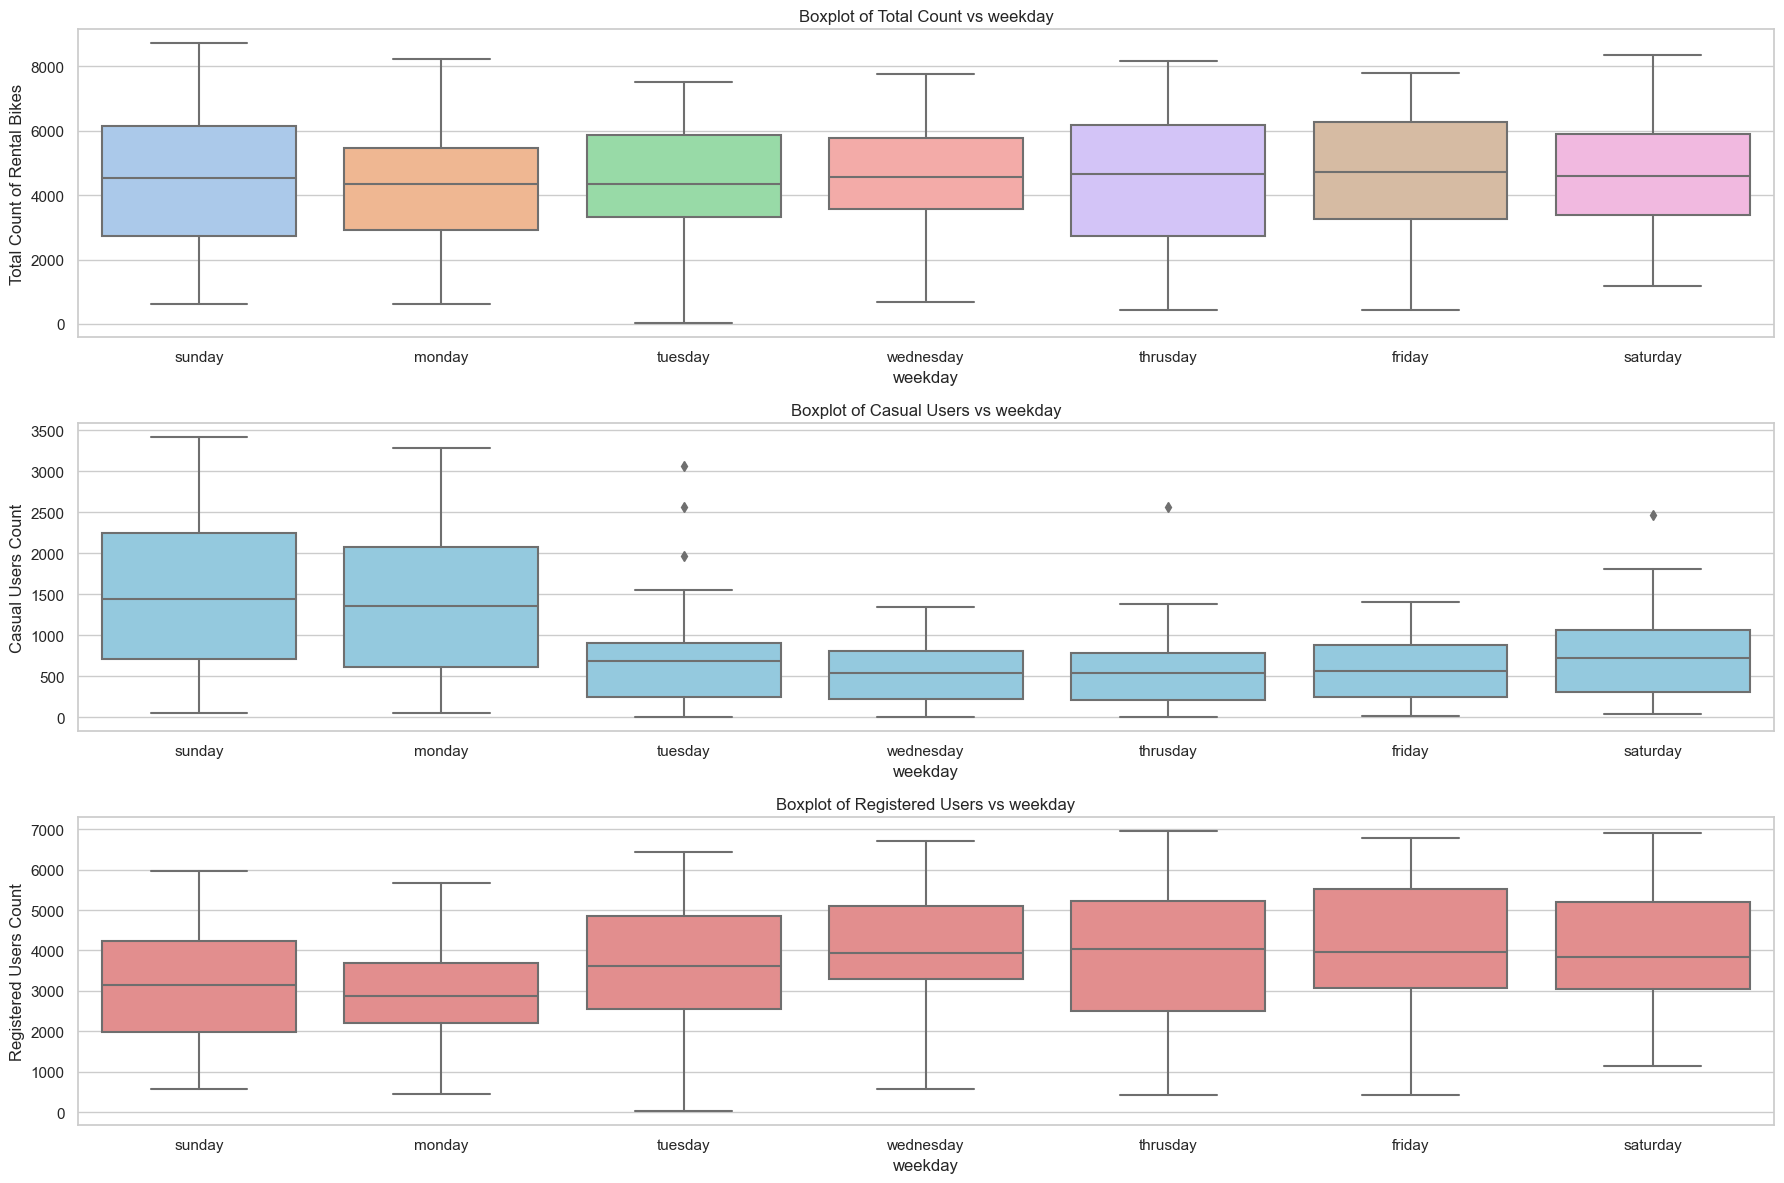

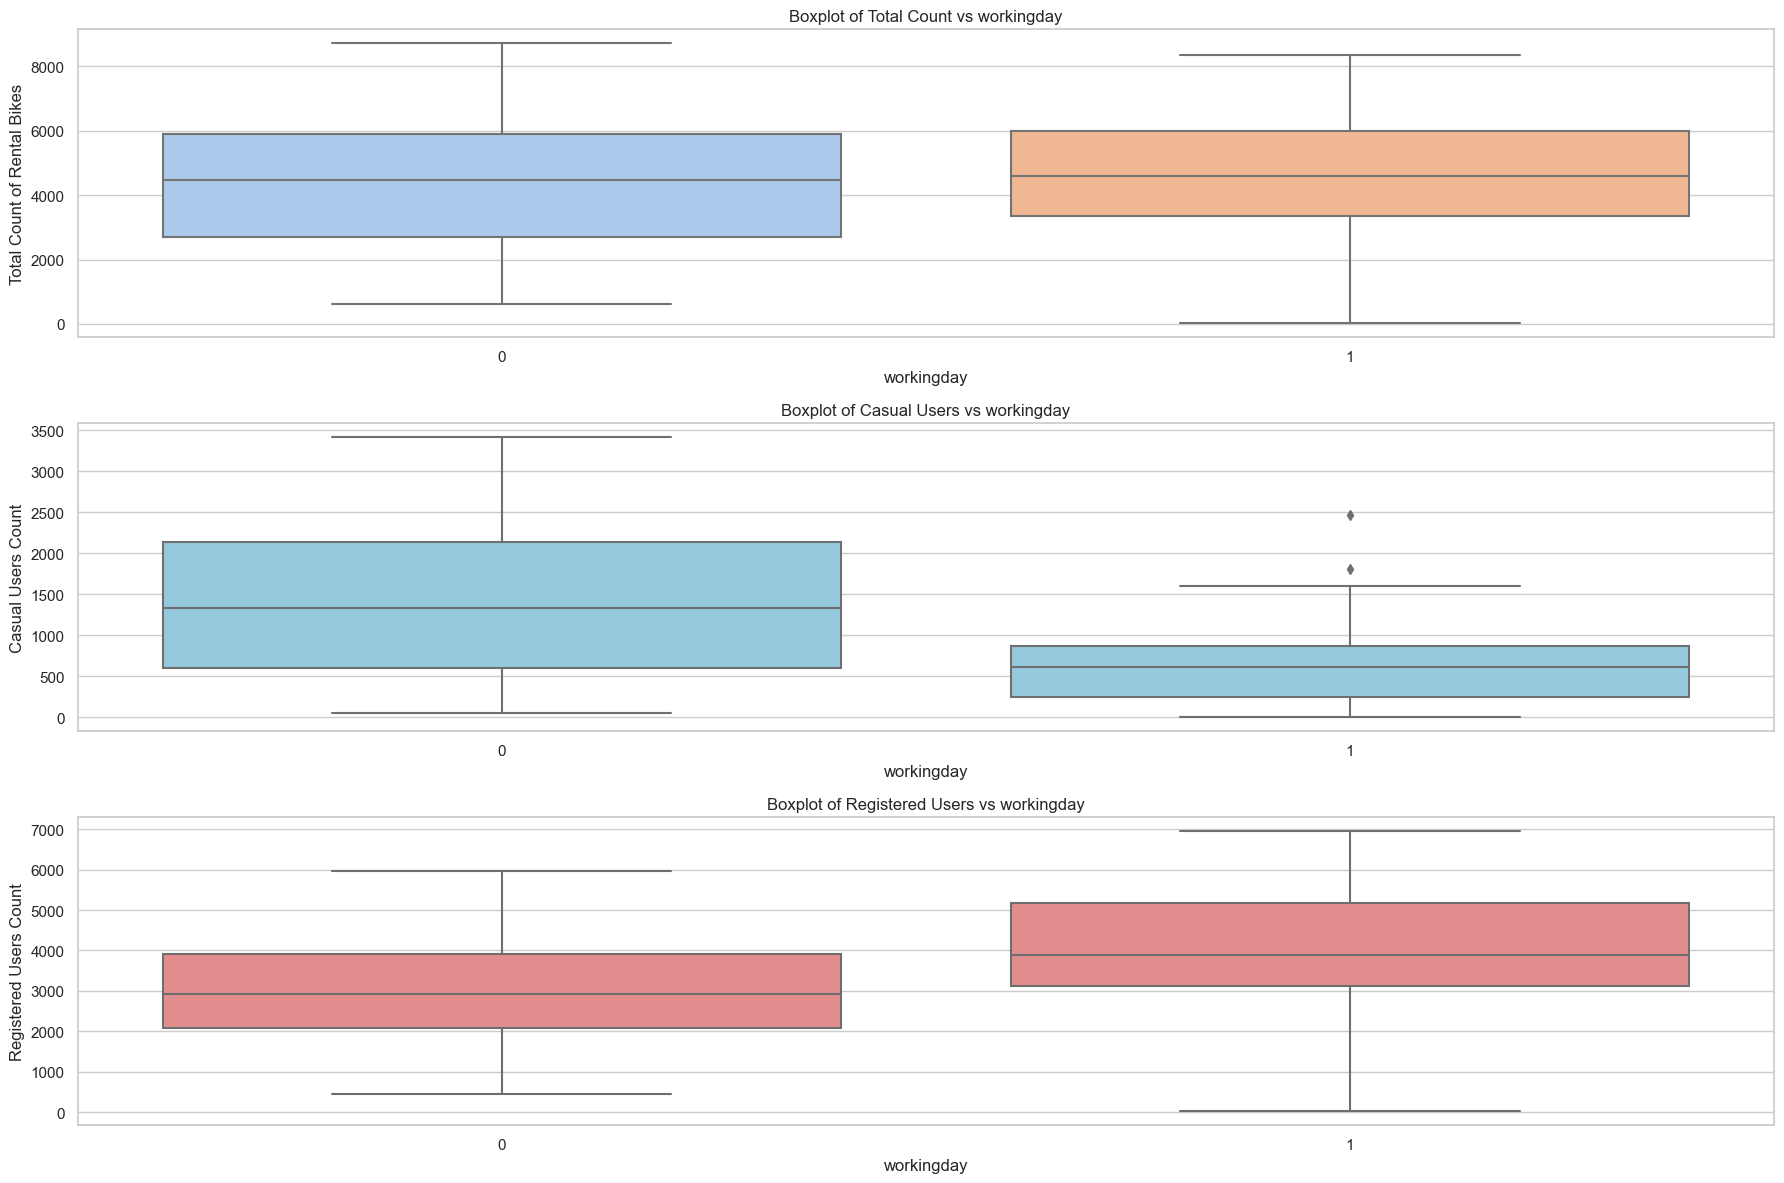

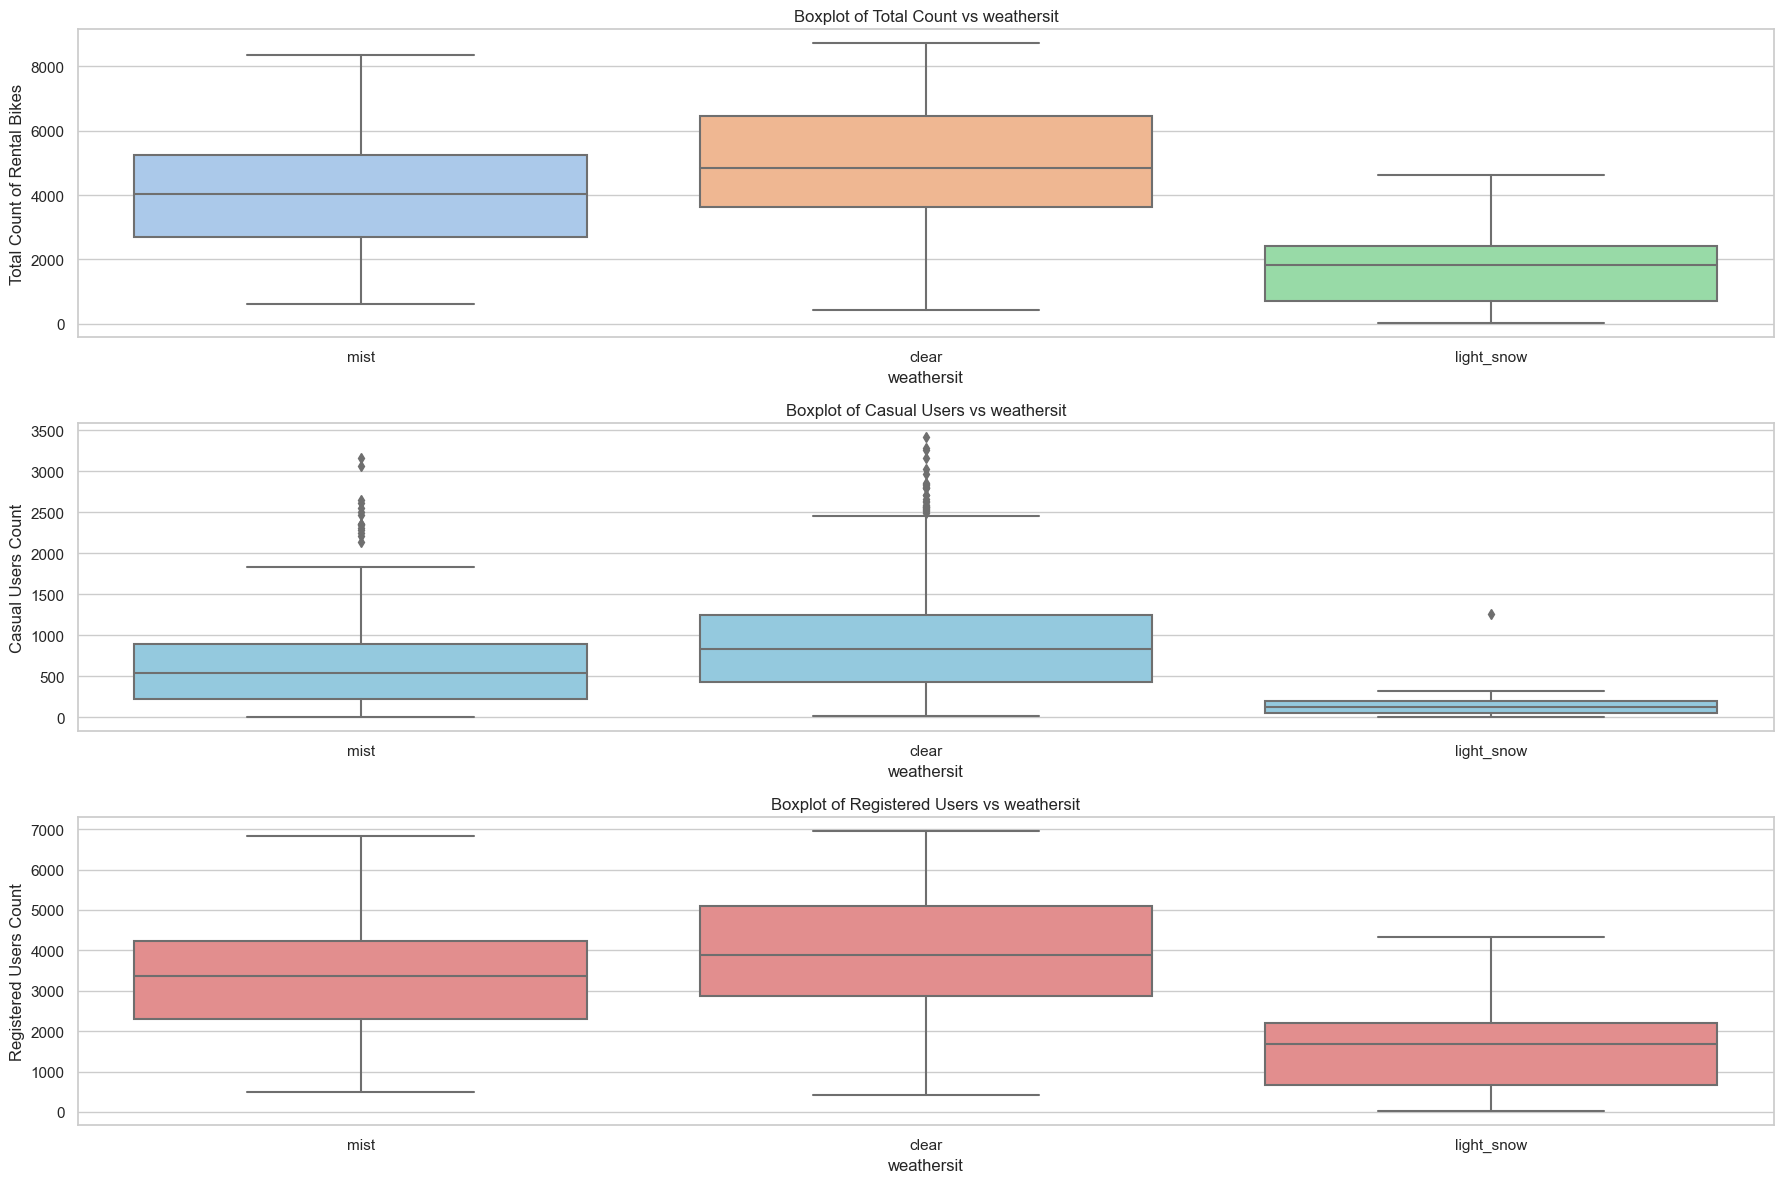

In [21]:
# Boxplots for categorical variables


for column in categorical_columns:
    plt.figure(figsize=(18, 12))
    sns.set(style="whitegrid")
    
    # Boxplot for Total Count
    plt.subplot(3, 1, 1)
    sns.boxplot(x=column, y='cnt', data=dayData, palette='pastel')
    plt.title(f'Boxplot of Total Count vs {column}')
    plt.xlabel(column)
    plt.ylabel('Total Count of Rental Bikes')

    # Boxplot for Casual Users
    plt.subplot(3, 1, 2)
    sns.boxplot(x=column, y='casual', data=dayData, color='skyblue')
    plt.title(f'Boxplot of Casual Users vs {column}')
    plt.xlabel(column)
    plt.ylabel('Casual Users Count')

    # Boxplot for Registered Users
    plt.subplot(3, 1, 3)
    sns.boxplot(x=column, y='registered', data=dayData, color='lightcoral')
    plt.title(f'Boxplot of Registered Users vs {column}')
    plt.xlabel(column)
    plt.ylabel('Registered Users Count')

    plt.tight_layout()
    plt.show()


In [22]:
status = pd.get_dummies(dayData['season'], dtype='int', drop_first=True)
status.head()

dayData = pd.concat([dayData, status], axis=1)
dayData = dayData.drop('season', axis=1)
dayData.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,0,1,0,sunday,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,0,1,0,monday,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,0,1,0,tuesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,0,1,0,wednesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,0,1,0,thrusday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [23]:
status = pd.get_dummies(dayData['weathersit'], dtype='int', drop_first=True)
status.head()

dayData = pd.concat([dayData, status], axis=1)
dayData = dayData.drop('weathersit', axis=1)
dayData.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,light_snow,mist
0,0,1,0,sunday,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,0,1,0,monday,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,0,1,0,tuesday,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,0,1,0,wednesday,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,0,1,0,thrusday,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [24]:
status = pd.get_dummies(dayData['weekday'], dtype='int', drop_first=True)
status.head()

dayData = pd.concat([dayData, status], axis=1)
dayData = dayData.drop('weekday', axis=1)
dayData.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,summer,winter,light_snow,mist,monday,saturday,sunday,thrusday,tuesday,wednesday
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,1,1,0,0,0,0,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,1,0,0


In [25]:
df_train, df_test = train_test_split(dayData, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 22)
(220, 22)


In [26]:
# 1. instantiate an object
scaler = MinMaxScaler()

num_var = ['mnth', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
# 2. fit on data
df_train[num_var] = scaler.fit_transform(df_train[num_var])

df_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,summer,winter,light_snow,mist,monday,saturday,sunday,thrusday,tuesday,wednesday
576,1,0.545455,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,...,0,0,0,0,0,0,0,0,0,1
426,1,0.181818,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,...,0,0,0,1,0,0,1,0,0,0
728,1,1.000000,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,...,0,0,0,0,1,0,0,0,0,0
482,1,0.272727,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,...,1,0,0,1,0,0,1,0,0,0
111,0,0.272727,0,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,...,1,0,0,1,0,1,0,0,0,0


In [27]:
df_train.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,summer,winter,light_snow,mist,monday,saturday,sunday,thrusday,tuesday,wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.503743,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,...,0.247059,0.247059,0.029412,0.345098,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373
std,0.500429,0.315038,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,...,0.431725,0.431725,0.169124,0.475867,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


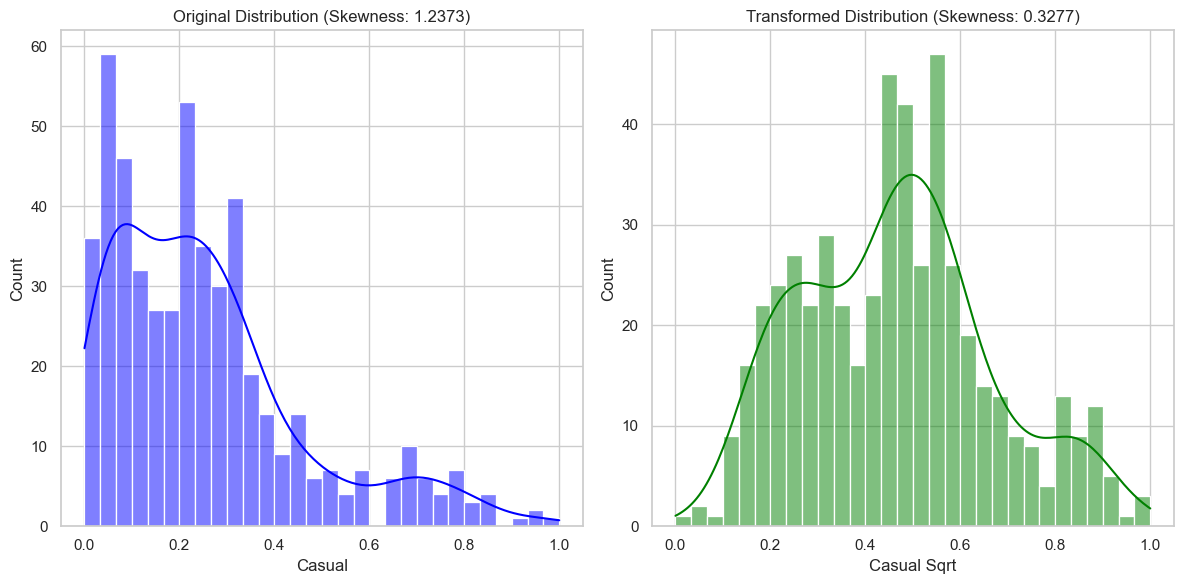

In [30]:
# Check the skewness of the 'casual' variable before transformation
before_skewness = df_train['casual'].skew()

# Apply square root transformation to address skewness
df_train['casual_sqrt'] = FunctionTransformer(np.sqrt).fit_transform(df_train[['casual']])

# Check the skewness of the transformed variable
after_skewness = df_train['casual_sqrt'].skew()

# Plot histograms for 'casual' before and after transformation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_train['casual'], bins=30, kde=True, color='blue')
plt.title(f'Original Distribution (Skewness: {before_skewness:.4f})')
plt.xlabel('Casual')

plt.subplot(1, 2, 2)
sns.histplot(df_train['casual_sqrt'], bins=30, kde=True, color='green')
plt.title(f'Transformed Distribution (Skewness: {after_skewness:.4f})')
plt.xlabel('Casual Sqrt')

plt.tight_layout()
plt.show()

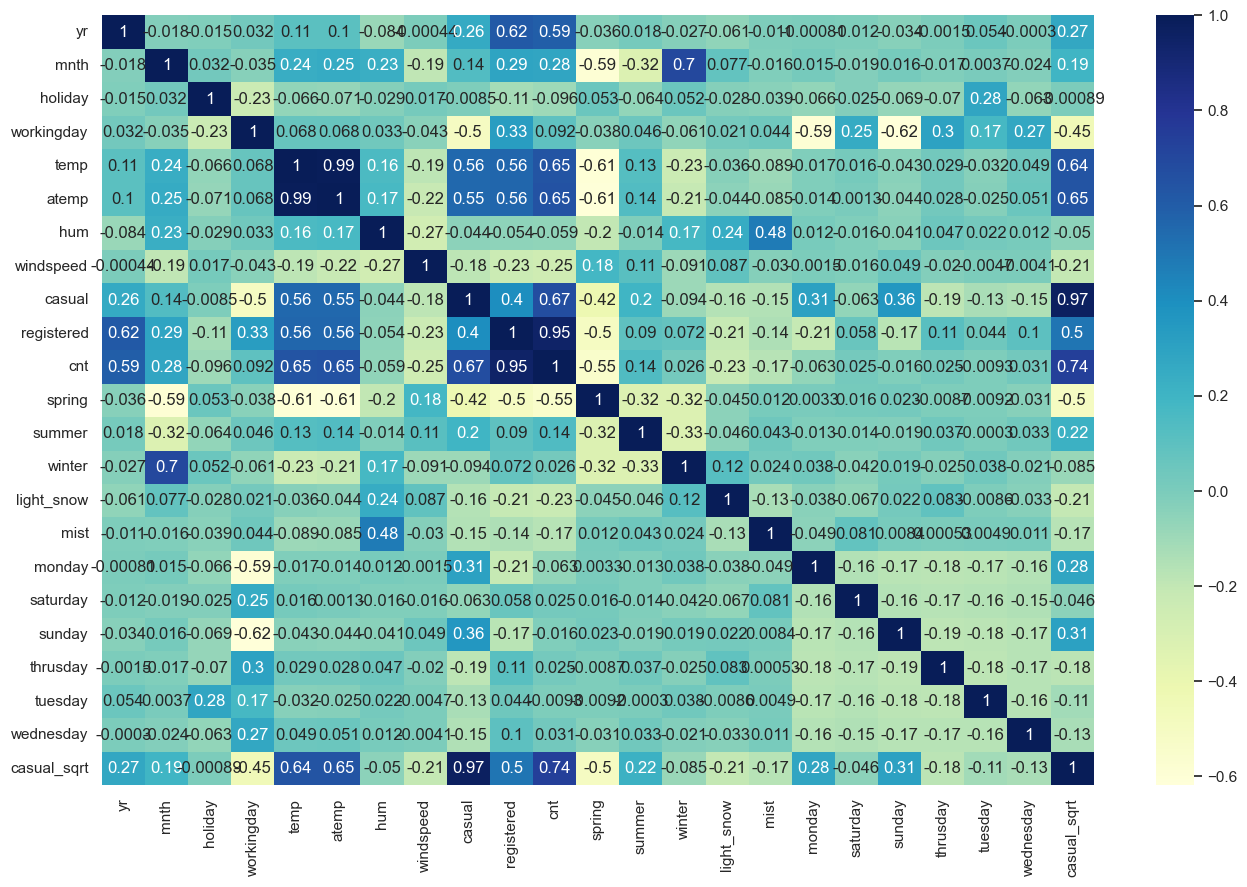

In [31]:
## Modeling
# heatMap
plt.figure(figsize=(16, 10))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [32]:
df_train.columns

Index(['yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'spring', 'summer',
       'winter', 'light_snow', 'mist', 'monday', 'saturday', 'sunday',
       'thrusday', 'tuesday', 'wednesday', 'casual_sqrt'],
      dtype='object')

- removing the below colums as they are highly corelated and may cause overfitting
    - temp
    - registered


In [33]:
# Variables like registered, casual_sqrt have high correlations with cnt -- either of the one must be included in model
# Variables like day, workingday, weekday provide very less information -- all three can be excluded
# Variables atem and temp seem to provide same information -- one must be dropped

cols_to_drop = ['workingday', 'atemp', 'registered']
df_train = df_train.drop(cols_to_drop, axis=1)

In [34]:
# X_train, y_train

y_train = df_train.pop('cnt')
X_train = df_train

# Demo code

In [35]:
# Assuming X_train and y_train are your feature and target matrices, respectively
lm = LinearRegression()

# Specify the number of features to select (e.g., 15)
num_features_to_select = 10

# Create RFE model and select features
rfe = RFE(lm, n_features_to_select=num_features_to_select, step=1)
X_train_rfe = rfe.fit_transform(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 9),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', False, 4),
 ('spring', False, 2),
 ('summer', False, 7),
 ('winter', True, 1),
 ('light_snow', True, 1),
 ('mist', False, 3),
 ('monday', True, 1),
 ('saturday', False, 5),
 ('sunday', True, 1),
 ('thrusday', False, 8),
 ('tuesday', False, 6),
 ('wednesday', False, 10),
 ('casual_sqrt', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'winter', 'light_snow',
       'monday', 'sunday', 'casual_sqrt'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['mnth', 'casual', 'spring', 'summer', 'mist', 'saturday', 'thrusday',
       'tuesday', 'wednesday'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [41]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [42]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     551.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.49e-262
Time:                        15:28:27   Log-Likelihood:                 673.55
No. Observations:                 510   AIC:                            -1325.
Df Residuals:                     499   BIC:                            -1279.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1070      0.019      5.539      

In [43]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

In [44]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [45]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     551.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.49e-262
Time:                        15:28:33   Log-Likelihood:                 673.55
No. Observations:                 510   AIC:                            -1325.
Df Residuals:                     499   BIC:                            -1279.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1070      0.019      5.539      

In [46]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'winter',
       'light_snow', 'monday', 'sunday', 'casual_sqrt'],
      dtype='object')

In [47]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.65
10,casual_sqrt,4.26
3,temp,3.04
9,sunday,1.78
8,monday,1.61
4,hum,1.31
5,windspeed,1.20
1,yr,1.19
7,light_snow,1.18
6,winter,1.16


In [48]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [49]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

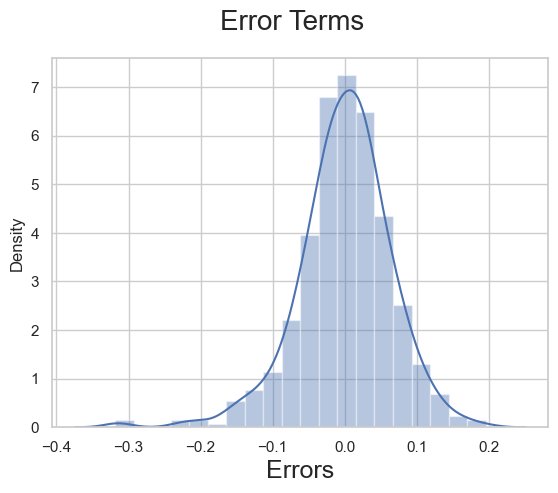

In [50]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

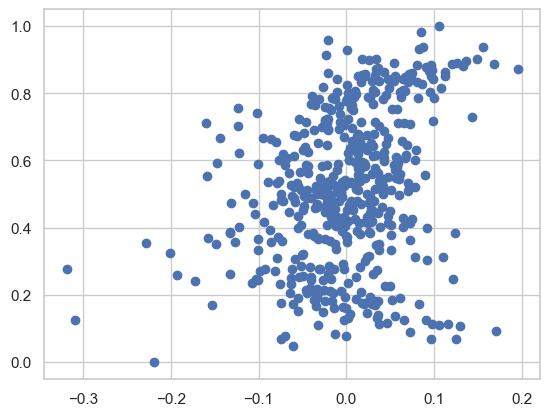

In [51]:
plt.scatter(y_train - y_train_price, y_train); # No definite pattern found which fails to void our assumption

# Making Predictions


### Applying the scaling on the test sets

In [52]:
num_vars = ['mnth', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [53]:
# Check the skewness of the 'casual' variable
print(df_test['casual'].skew())

# Apply square root transformation to address skewness
from sklearn.preprocessing import FunctionTransformer
df_test['casual_sqrt'] = FunctionTransformer(np.sqrt).fit_transform(df_test[['casual']])
df_test = df_test.drop(columns=['casual'], axis=1)

# Check the skewness of the transformed variable
print(df_test['casual_sqrt'].skew())

1.3228380743239396
0.3947837458315335


In [54]:
# X_train, y_train

y_test = df_test.pop('cnt')
X_test = df_test

In [55]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [56]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

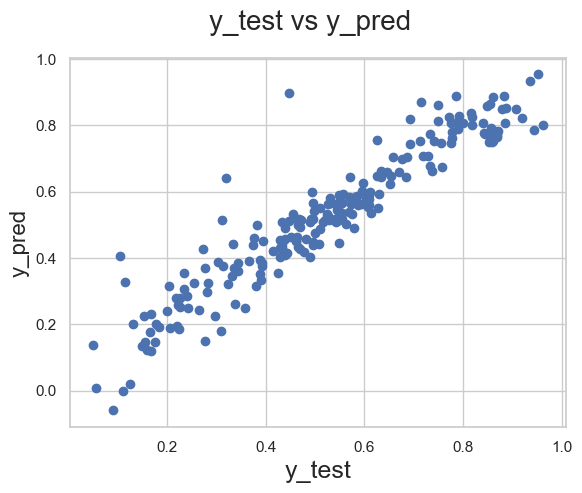

In [57]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

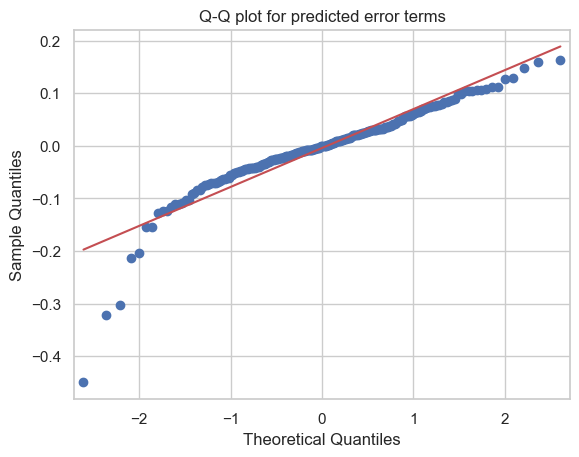

In [58]:
residuals = y_test - y_pred

sm.qqplot(residuals, line='s')
plt.title('Q-Q plot for predicted error terms')
plt.grid(True)
plt.show()

In [59]:
# evaluate
r2_score(y_true = y_test, y_pred = y_pred)

0.8851199859976614